# Online Gaming Behavior – Offline Analytics Pipeline

Bao gồm:
1. Phân tích mô tả dataset (EDA)
2. Phân tích tương quan giữa các biến
3. Phân cụm người chơi (clustering)
4. Vẽ các biểu đồ dạng dashboard


In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv("../data/online_gaming_behavior_dataset.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


## 1 : Phân tích mô tả dataset (EDA)

In [8]:
print("=== INFO ===")
print(df.info())

print("\n=== DESCRIBE (numeric) ===")
display(df.describe())

print("\n=== DESCRIBE (all) ===")
display(df.describe(include='all'))

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000



=== DESCRIBE (all) ===


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
count,40034.000000,40034.000000,40034,40034,40034,40034.000000,40034.000000,40034,40034.000000,40034.000000,40034.000000,40034.000000,40034
unique,NaN,NaN,2,4,5,NaN,NaN,3,NaN,NaN,NaN,NaN,3
top,NaN,NaN,Male,USA,Sports,NaN,NaN,Easy,NaN,NaN,NaN,NaN,Medium
freq,NaN,NaN,23959,16000,8048,NaN,NaN,20015,NaN,NaN,NaN,NaN,19374
mean,29016.500000,31.992531,NaN,NaN,NaN,12.024365,0.200854,NaN,9.471774,94.792252,49.655568,24.526477,NaN
std,11556.964675,10.043227,NaN,NaN,NaN,6.914638,0.400644,NaN,5.763667,49.011375,28.588379,14.430726,NaN
min,9000.000000,15.000000,NaN,NaN,NaN,0.000115,0.000000,NaN,0.000000,10.000000,1.000000,0.000000,NaN
25%,19008.250000,23.000000,NaN,NaN,NaN,6.067501,0.000000,NaN,4.000000,52.000000,25.000000,12.000000,NaN
50%,29016.500000,32.000000,NaN,NaN,NaN,12.008002,0.000000,NaN,9.000000,95.000000,49.000000,25.000000,NaN
75%,39024.750000,41.000000,NaN,NaN,NaN,17.963831,0.000000,NaN,14.000000,137.000000,74.000000,37.000000,NaN


In [9]:

categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n=== Value counts for {col} ===")
        print(df[col].value_counts(normalize=True) * 100)

if 'EngagementLevel' in df.columns:
    behavior_cols = ['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
                     'InGamePurchases', 'AchievementsUnlocked', 'PlayerLevel']
    print("\n=== Mean behavior by EngagementLevel ===")
    display(df.groupby('EngagementLevel')[behavior_cols].mean())


=== Value counts for Gender ===
Gender
Male      59.84663
Female    40.15337
Name: proportion, dtype: float64

=== Value counts for Location ===
Location
USA       39.966029
Europe    29.984513
Asia      20.220313
Other      9.829145
Name: proportion, dtype: float64

=== Value counts for GameGenre ===
GameGenre
Sports        20.102913
Action        20.080432
Strategy      20.012989
Simulation    19.940551
RPG           19.863116
Name: proportion, dtype: float64

=== Value counts for GameDifficulty ===
GameDifficulty
Easy      49.995004
Medium    30.001998
Hard      20.002997
Name: proportion, dtype: float64

=== Value counts for EngagementLevel ===
EngagementLevel
Medium    48.393865
High      25.818055
Low       25.788080
Name: proportion, dtype: float64

=== Mean behavior by EngagementLevel ===


,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,InGamePurchases,AchievementsUnlocked,PlayerLevel
EngagementLevel,,,,,,
High,12.069238,14.254547,131.921827,0.206463,25.095975,50.823723
Low,12.104915,4.530511,66.882119,0.197307,22.661565,46.101414
Medium,11.957503,9.553267,89.856405,0.199752,25.216424,50.926293


## 2 : Phân tích correlation giữa các biến

In [10]:

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()
display(corr_matrix)

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
PlayerID,1.000000,-0.003044,0.000923,0.002321,-0.005944,-0.001801,-0.001769,0.003190
Age,-0.003044,1.000000,0.002462,-0.000186,0.008777,-0.002269,0.001353,-0.001100
PlayTimeHours,0.000923,0.002462,1.000000,-0.006067,-0.003655,-0.001925,-0.005152,0.003913
InGamePurchases,0.002321,-0.000186,-0.006067,1.000000,0.005132,-0.003059,0.006524,0.000098
SessionsPerWeek,-0.005944,0.008777,-0.003655,0.005132,1.000000,-0.000620,0.003257,0.003187
AvgSessionDurationMinutes,-0.001801,-0.002269,-0.001925,-0.003059,-0.000620,1.000000,0.001368,-0.002227
PlayerLevel,-0.001769,0.001353,-0.005152,0.006524,0.003257,0.001368,1.000000,0.006343
AchievementsUnlocked,0.003190,-0.001100,0.003913,0.000098,0.003187,-0.002227,0.006343,1.000000


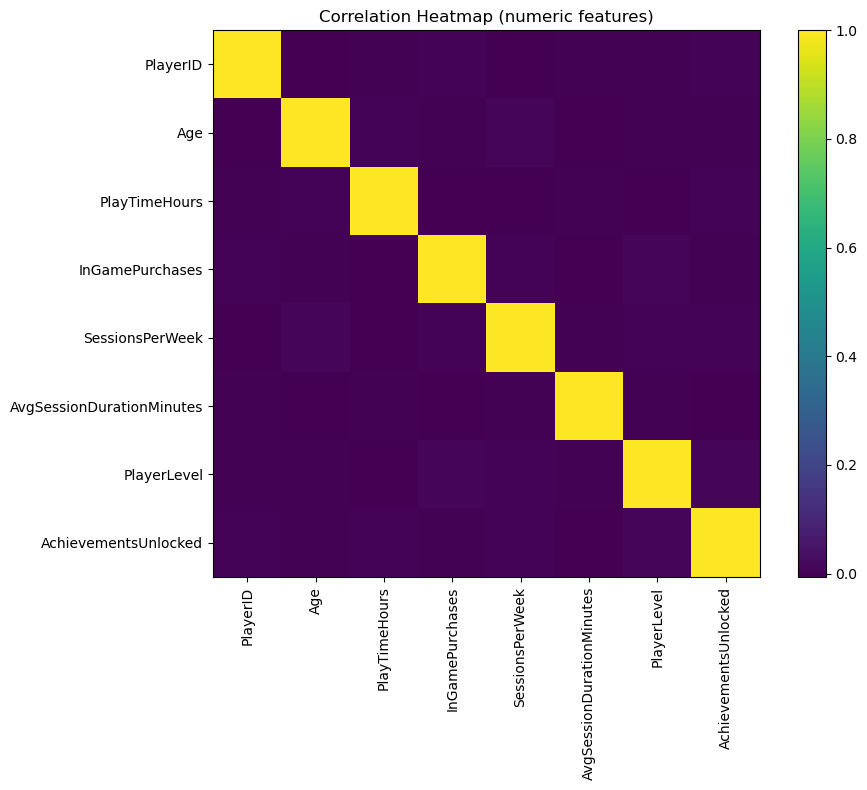

In [11]:

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, interpolation='nearest')
plt.title('Correlation Heatmap (numeric features)')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.tight_layout()
plt.show()

## 3 : Phân cụ người chơi (Clustering)

In [12]:

cluster_features = ['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
                    'InGamePurchases', 'AchievementsUnlocked', 'PlayerLevel']

for col in cluster_features:
    if col not in df.columns:
        raise ValueError(f'Thiếu cột {col} trong dataset để phân cụm')

X_cluster = df[cluster_features].copy()

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)


k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

df['Cluster'] = cluster_labels

sil_score = silhouette_score(X_cluster_scaled, cluster_labels)
print(f'Silhouette score (k={k}): {sil_score:.4f}')
df[['PlayerID', 'EngagementLevel', 'Cluster']].head()

Silhouette score (k=4): 0.1426


,PlayerID,EngagementLevel,Cluster
0,9000,Medium,0
1,9001,Medium,3
2,9002,High,3
3,9003,Medium,2
4,9004,Medium,1


In [13]:

cluster_summary = df.groupby('Cluster')[cluster_features + ['InGamePurchases']].mean()
display(cluster_summary)

if 'EngagementLevel' in df.columns:
    print('\nPhân bố EngagementLevel trong từng cụm:')
    display(pd.crosstab(df['Cluster'], df['EngagementLevel'], normalize='index'))

,PlayTimeHours,SessionsPerWeek,AvgSessionDurationMinutes,InGamePurchases,AchievementsUnlocked,PlayerLevel,InGamePurchases
Cluster,,,,,,,
0,19.268104,9.292543,96.069263,0.0,24.741342,47.511682,0.0
1,8.029670,9.533162,93.941078,0.0,24.886103,76.961015,0.0
2,11.940694,9.530780,94.493222,1.0,24.529287,50.027609,1.0
3,7.297077,9.580737,94.344398,0.0,23.887141,23.736493,0.0



Phân bố EngagementLevel trong từng cụm:


EngagementLevel,High,Low,Medium
Cluster,,,
0,0.255261,0.263960,0.480779
1,0.264311,0.228977,0.506711
2,0.265390,0.253327,0.481283
3,0.249515,0.284036,0.466449


## 5️⃣ Vẽ dashboard biểu đồ (offline)

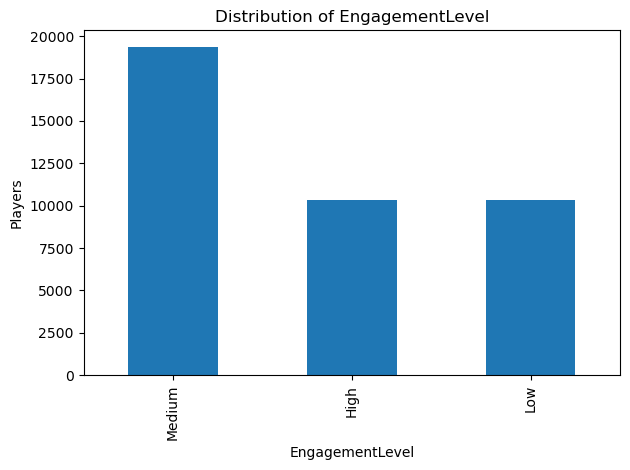

In [14]:

if 'EngagementLevel' in df.columns:
    counts = df['EngagementLevel'].value_counts()
    plt.figure()
    counts.plot(kind='bar')
    plt.title('Distribution of EngagementLevel')
    plt.xlabel('EngagementLevel')
    plt.ylabel('Players')
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8652\667587978.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df['EngagementLevel'].unique()))


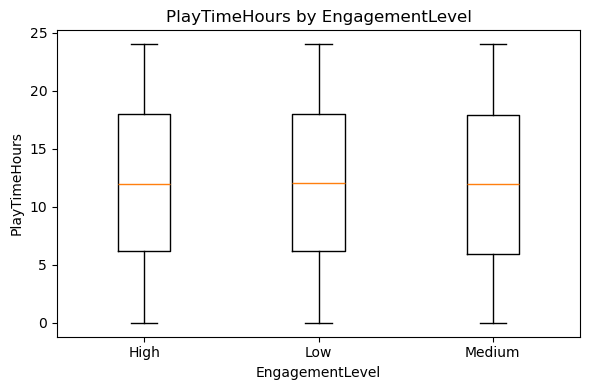

In [15]:

if 'EngagementLevel' in df.columns:
    plt.figure(figsize=(6,4))
    data_to_plot = [df[df['EngagementLevel'] == lvl]['PlayTimeHours'] for lvl in sorted(df['EngagementLevel'].unique())]
    plt.boxplot(data_to_plot, labels=sorted(df['EngagementLevel'].unique()))
    plt.title('PlayTimeHours by EngagementLevel')
    plt.xlabel('EngagementLevel')
    plt.ylabel('PlayTimeHours')
    plt.tight_layout()
    plt.show()

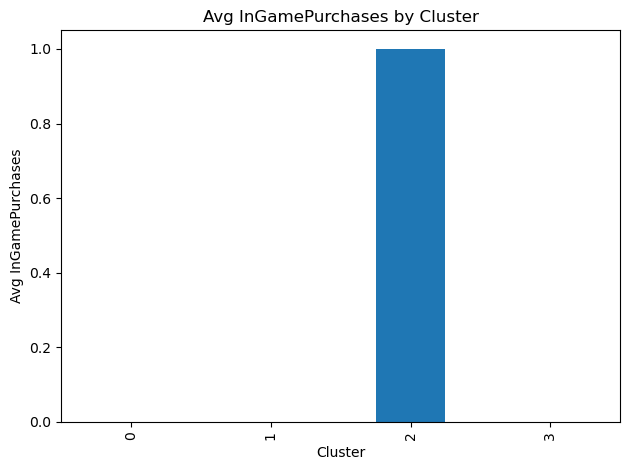

In [16]:

if 'Cluster' in df.columns:
    cluster_pur = df.groupby('Cluster')['InGamePurchases'].mean()
    plt.figure()
    cluster_pur.plot(kind='bar')
    plt.title('Avg InGamePurchases by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Avg InGamePurchases')
    plt.tight_layout()
    plt.show()

In [18]:

from pathlib import Path

# === 1. Summary Engagement Distribution ===
engagement_dist = df['EngagementLevel'].value_counts().to_string()

# === 2. Summary PlayTimeHours vs Engagement ===
playtime_summary = df.groupby('EngagementLevel')['PlayTimeHours'].describe().to_string()

# === 3. Correlation Summary ===
correlation_summary = corr_matrix.to_string()

# === 4. Clustering Summary ===
cluster_summary_text = df.groupby('Cluster')[cluster_features].mean().to_string()

# === 5. Cluster × EngagementLevel ===
cluster_engagement = pd.crosstab(df['Cluster'], df['EngagementLevel'], normalize='index').to_string()

# === Build report text ===
report_text = f"""
# Game Analytics – Key Findings

## 1. Engagement Distribution
{engagement_dist}

## 2. PlayTimeHours by EngagementLevel
{playtime_summary}

## 3. Correlation Matrix (numeric features)
{correlation_summary}

## 4. Cluster Behavior Summary
{cluster_summary_text}

## 5. Engagement Distribution per Cluster
{cluster_engagement}

"""
output_path = "analysis_report.md"
Path(output_path).write_text(report_text, encoding="utf-8")

print("Report exported to:", output_path)


Report exported to: analysis_report.md
